In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors
from mpl_toolkits import mplot3d
from math import sqrt
import warnings

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder, MinMaxScaler


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams["savefig.format"] = 'tiff'
warnings.filterwarnings("ignore")

In [ ]:
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=2)


In [ ]:
# Learning Rate Scheduler
def scheduler(epoch, lr):
  if epoch < 160:
    return lr
  else:
    return lr * np.exp(-0.1)

callback = keras.callbacks.LearningRateScheduler(scheduler)



# Neural Network
def Neural_network():
    init = keras.initializers.random_normal()
    model=Sequential()
    model.add(layers.Dense(64,activation='relu',kernel_initializer=init, input_dim=scaled_DF.shape[1]))
    model.add(layers.Dropout(0.1))
    

    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(128,activation='relu',kernel_initializer=init))
    model.add(layers.Dropout(0.1))

    
    model.add(layers.Dense(1,kernel_initializer=init,activation = 'linear'))
 
    
    optimize=tf.keras.optimizers.Adam()
    
    model.compile(optimizer=optimize,
                    loss='mse',
                    )
    return model



In [ ]:
# Funtion to train the model
def training_model(X_train,Y_train,model):
    history=model.fit(X_train,Y_train,epochs=200,batch_size=64,verbose=0,callbacks=[callback])
    return history

In [ ]:
# To print losses
def plots():
    f, ax = plt.subplots(1,1)
    actual_test=np.array(scaler.inverse_transform(testY).reshape(-1,1))
    predicted_test=np.array(scaler.inverse_transform(model.predict(testX).reshape(-1,1)))

    #actual=testY
    #predicted= model.predict(testX)

    actual=np.array(scaler.inverse_transform(np.array(trainY).reshape(-1,1)))
    predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))


    plt.scatter(actual_test,predicted_test, color='blue', label='Test') #linewidths=0.5, edgecolors='orange')
    sns.regplot(actual,predicted, color='lightcoral', label='Train')

    print("Mean absolute error (MAE):      %f" % mean_absolute_error(actual_test,predicted_test))
    print("Mean squared error (MSE):       %f" % mean_squared_error(actual_test,predicted_test))
    print("Root mean squared error (RMSE): %f" % sqrt(mean_squared_error(actual_test,predicted_test)))
    print("R square (R^2):                 %f" % r2_score(actual_test,predicted_test))
    
    
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    #plt.suptitle("Actual Vs Predicted")
    anchored_text = AnchoredText("R\u00b2 Score_train  "+str(round(r2_score(actual,predicted),3))+'\n'"R\u00b2 Score_test  "+str(round(r2_score(actual_test,predicted_test),3)), loc=2,prop=dict(size=15))
    ax.add_artist(anchored_text)
    
    plt.legend(loc = 9, prop={'size': 15}) #labels=["Test","Train"], 
    plt.tight_layout()
    plt.savefig(str(model)[1:6], bbox_inches='tight')
    plt.show()

In [ ]:
def defining_model(x):
  
    elif x=='rndmfrst':
      model = RandomForestRegressor()
      else:
      print("wrong selection")
    return model



In [ ]:
# Getting data from CSV file
Train = pd.read_excel('Train.xlsx')
Test = pd.read_excel('Test.xlsx')
display(Train)
display(Test)

,Name of the Reagent,Smiles,Type of Reagent,Reagent ID Number,Solvent,FPD,ABC,nAcid,nBase,SpMax_A,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,MeCN,229.6,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
1,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,DCM,242.4,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
2,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,MeCN,231.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
3,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,DCM,244.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
4,N-fluoro-4-methyl-N-(phenylsulfonyl)benzenesul...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(C)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1c,MeCN,230.3,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,"(1R,2R,4S,5S)-2-((S)-acetoxy(6-methoxyquinolin...",F[N@+]1(C[C@H]2CC)[C@@H]([C@@H](OC(C)=O)C3=C(C...,N-Fluoroammoniums,F6c,DCM,250.7,22.034198,0,1,2.555561,...,0.086957,0.045000,0.049444,0.029684,0.018022,0.018353,0.012311,0.007049,0.010597,1.000000
216,Dinitrogen Fluoride,N#[N+]F,N-Fluoroammoniums,F7,MeCN,110.9,1.414214,0,1,1.414214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
217,Dinitrogen Fluoride,N#[N+]F,N-Fluoroammoniums,F7,DCM,112.3,1.414214,0,1,1.414214,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
218,Ammonium Fluoride,F[N+](F)(F)F,N-Fluoroammoniums,F8,MeCN,150.9,3.464102,0,1,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


,Name of the Reagent,Smiles,Type of Reagent,Reagent ID Number,Solvent,FPD,ABC,nAcid,nBase,SpMax_A,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,4-bromo-N-fluoro-N-(phenylsulfonyl)benzenesulf...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1f,MeCN,228.3,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
1,4-bromo-N-fluoro-N-(phenylsulfonyl)benzenesulf...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1f,DCM,240.9,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
2,4-(tert-butyl)-N-((4-(tert-butyl)phenyl)sulfon...,O=S(C1=CC=C(C(C)(C)C)C=C1)(N(S(C2=CC=C(C(C)(C)...,N-Fluorosulfonimides,A1k,MeCN,231.4,21.835015,0,0,2.495940,...,0.137116,0.072500,0.041877,0.048203,0.031888,0.013310,0.018334,0.010096,0.009723,1.000000
3,4-(tert-butyl)-N-((4-(tert-butyl)phenyl)sulfon...,O=S(C1=CC=C(C(C)(C)C)C=C1)(N(S(C2=CC=C(C(C)(C)...,N-Fluorosulfonimides,A1k,DCM,244.2,21.835015,0,0,2.495940,...,0.137116,0.072500,0.041877,0.048203,0.031888,0.013310,0.018334,0.010096,0.009723,1.000000
4,4-bromo-N-((4-bromophenyl)sulfonyl)-N-fluorobe...,O=S(C1=CC=C(Br)C=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=...,N-Fluorosulfonimides,A1n,MeCN,227.2,16.980862,0,0,2.484579,...,0.133333,0.069079,0.049832,0.045139,0.017268,0.016204,0.009358,0.012812,0.006612,1.000000
5,4-bromo-N-((4-bromophenyl)sulfonyl)-N-fluorobe...,O=S(C1=CC=C(Br)C=C1)(N(S(C2=CC=C(Br)C=C2)(=O)=...,N-Fluorosulfonimides,A1n,DCM,239.5,16.980862,0,0,2.484579,...,0.133333,0.069079,0.049832,0.045139,0.017268,0.016204,0.009358,0.012812,0.006612,1.000000
6,"2-fluoro-2H-benzo[d][1,3,2]dithiazole 1,1,3,3-...",FN1S(C2=CC=CC=C2S1(=O)=O)(=O)=O,N-Fluorosulfonimides,A2,MeCN,224.2,11.064788,0,0,2.595309,...,0.142222,0.117798,0.030154,0.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
7,"2-fluoro-2H-benzo[d][1,3,2]dithiazole 1,1,3,3-...",FN1S(C2=CC=CC=C2S1(=O)=O)(=O)=O,N-Fluorosulfonimides,A2,DCM,235.8,11.064788,0,0,2.595309,...,0.142222,0.117798,0.030154,0.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
8,"perfluoro-1,3,2-dithiazinane 1,1,3,3-tetraoxide",FN(S(=O)(C(F)(C(F)(C(F)1F)F)F)=O)S1(=O)=O,N-Fluorosulfonimides,A5b,MeCN,200.2,13.217235,0,0,2.691081,...,0.215488,0.087500,0.065233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
9,"perfluoro-1,3,2-dithiazinane 1,1,3,3-tetraoxide",FN(S(=O)(C(F)(C(F)(C(F)1F)F)F)=O)S1(=O)=O,N-Fluorosulfonimides,A5b,DCM,211.5,13.217235,0,0,2.691081,...,0.215488,0.087500,0.065233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000


In [ ]:
# Combine Train and test for feature engineering
DF = pd.concat([Train,Test],ignore_index=True)
DF_data = DF.copy()
DF

,Name of the Reagent,Smiles,Type of Reagent,Reagent ID Number,Solvent,FPD,ABC,nAcid,nBase,SpMax_A,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,TopoShapeIndex
0,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,MeCN,229.6,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
1,N-fluoro-N-(phenylsulfonyl)benzenesulfonamide,O=S(C1=CC=CC=C1)(N(S(C2=CC=C([H])C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1a,DCM,242.4,15.347868,0,0,2.478172,...,0.121864,0.073529,0.041864,0.035791,0.018367,0.008433,0.004031,0.005625,0.000000,1.000000
2,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,MeCN,231.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
3,N-fluoro-4-methoxy-N-(phenylsulfonyl)benzenesu...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(OC)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1b,DCM,244.2,16.762082,0,0,2.482426,...,0.124183,0.067434,0.044444,0.041419,0.020408,0.012427,0.010078,0.006944,0.004959,1.000000
4,N-fluoro-4-methyl-N-(phenylsulfonyl)benzenesul...,O=S(C1=CC=CC=C1)(N(S(C2=CC=C(C)C=C2)(=O)=O)F)=O,N-Fluorosulfonimides,A1c,MeCN,230.3,16.164365,0,0,2.481475,...,0.127946,0.071181,0.045972,0.040638,0.017746,0.012804,0.007421,0.010417,0.008264,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,"1-fluoro-4-hydroxy-1,4-diazabicyclo[2.2.2]octa...",F[N+]1(CC2)CC[N+]2(O)CC1,N-Fluoroammoniums,F1b (Not optimised),DCM,222.3,8.096012,0,2,2.460505,...,0.111111,0.028846,0.262222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
256,"(1S,2S,4S)-1-fluoro-4-methyl-2,3-diphenyl-1,4-...",F[N@+]1(CC2)CC[N@+]2(C)C(C3=CC=CC=C3)[C@@H]1C4...,N-Fluoroammoniums,F2a,MeCN,230.1,17.750967,0,2,2.614028,...,0.093567,0.062500,0.052398,0.021680,0.014694,0.007440,0.008062,0.000000,0.000000,0.800000
257,"(1S,2S,4S)-1-fluoro-4-methyl-2,3-diphenyl-1,4-...",F[N@+]1(CC2)CC[N@+]2(C)C(C3=CC=CC=C3)[C@@H]1C4...,N-Fluoroammoniums,F2a,DCM,226.8,17.750967,0,2,2.614028,...,0.093567,0.062500,0.052398,0.021680,0.014694,0.007440,0.008062,0.000000,0.000000,0.800000
258,1-fluoroquinuclidin-1-ium,F[N+]1(CC2)CCC2CC1,N-Fluoroammoniums,F4,MeCN,252.9,7.229986,0,1,2.394170,...,0.088889,0.025000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333


In [ ]:
# Removing Unwanted columns
DF_data=DF_data.drop(['Smiles','Name of the Reagent' ],axis=1)
#DF_data

In [ ]:
DF_data = DF_data[['Solvent', 'Type of Reagent', 'FPD', 'BCUTc-1h','BCUTdv-1l','MATS1c', 'GATS2c']]

In [ ]:
DF_data

,Solvent,Type of Reagent,FPD,BCUTc-1h,BCUTdv-1l,MATS1c,GATS2c
0,MeCN,N-Fluorosulfonimides,229.6,0.500677,0.643432,-0.374141,1.133092
1,DCM,N-Fluorosulfonimides,242.4,0.500677,0.643432,-0.374141,1.133092
2,MeCN,N-Fluorosulfonimides,231.2,0.501258,0.643428,-0.353708,1.257014
3,DCM,N-Fluorosulfonimides,244.2,0.501258,0.643428,-0.353708,1.257014
4,MeCN,N-Fluorosulfonimides,230.3,0.500736,0.643428,-0.374509,1.110287
...,...,...,...,...,...,...,...
255,DCM,N-Fluoroammoniums,222.3,0.521458,1.886064,-0.131660,1.614970
256,MeCN,N-Fluoroammoniums,230.1,0.501493,0.995946,0.031945,2.075905
257,DCM,N-Fluoroammoniums,226.8,0.501493,0.995946,0.031945,2.075905
258,MeCN,N-Fluoroammoniums,252.9,0.409061,1.879727,-0.033773,1.688045


In [ ]:

# Scaling the whole DataFrame



scaler = StandardScaler()
scaled_DF = pd.DataFrame(scaler.fit_transform(DF_data.iloc[:,3:]))
scaled_DF.columns = DF_data.iloc[:,3:].columns

scaled_DF['FPD'] = scaler.fit_transform(np.array(DF_data['FPD']).reshape(-1,1))
scaled_DF

display(scaled_DF)

,BCUTc-1h,BCUTdv-1l,MATS1c,GATS2c,FPD
0,-0.281350,-0.647530,-0.318540,0.114754,-0.209117
1,-0.281350,-0.647530,-0.318540,0.114754,0.322217
2,-0.271801,-0.647534,-0.225652,0.426809,-0.142700
3,-0.271801,-0.647534,-0.225652,0.426809,0.396936
4,-0.280368,-0.647533,-0.320215,0.057330,-0.180060
...,...,...,...,...,...
255,0.060299,0.579596,0.783778,1.328200,-0.512144
256,-0.267938,-0.299415,1.527527,2.488909,-0.188362
257,-0.267938,-0.299415,1.527527,2.488909,-0.325347
258,-1.787500,0.573339,1.228771,1.512216,0.758078


In [ ]:
DF_target = scaled_DF[['FPD']]
scaled_DF.drop('FPD',axis=1,inplace=True)

display(scaled_DF)
display(DF_target)

,BCUTc-1h,BCUTdv-1l,MATS1c,GATS2c
0,-0.281350,-0.647530,-0.318540,0.114754
1,-0.281350,-0.647530,-0.318540,0.114754
2,-0.271801,-0.647534,-0.225652,0.426809
3,-0.271801,-0.647534,-0.225652,0.426809
4,-0.280368,-0.647533,-0.320215,0.057330
...,...,...,...,...
255,0.060299,0.579596,0.783778,1.328200
256,-0.267938,-0.299415,1.527527,2.488909
257,-0.267938,-0.299415,1.527527,2.488909
258,-1.787500,0.573339,1.228771,1.512216


,FPD
0,-0.209117
1,0.322217
2,-0.142700
3,0.396936
4,-0.180060
...,...
255,-0.512144
256,-0.188362
257,-0.325347
258,0.758078


In [ ]:
scaled_DF[[ 'Solvent']] = DF_data[['Solvent']]

In [ ]:
scaled_DF[['Type of Reagent']] = DF_data[['Type of Reagent']]


In [ ]:
scaled_DF

,BCUTc-1h,BCUTdv-1l,MATS1c,GATS2c,Solvent,Type of Reagent
0,-0.281350,-0.647530,-0.318540,0.114754,MeCN,N-Fluorosulfonimides
1,-0.281350,-0.647530,-0.318540,0.114754,DCM,N-Fluorosulfonimides
2,-0.271801,-0.647534,-0.225652,0.426809,MeCN,N-Fluorosulfonimides
3,-0.271801,-0.647534,-0.225652,0.426809,DCM,N-Fluorosulfonimides
4,-0.280368,-0.647533,-0.320215,0.057330,MeCN,N-Fluorosulfonimides
...,...,...,...,...,...,...
255,0.060299,0.579596,0.783778,1.328200,DCM,N-Fluoroammoniums
256,-0.267938,-0.299415,1.527527,2.488909,MeCN,N-Fluoroammoniums
257,-0.267938,-0.299415,1.527527,2.488909,DCM,N-Fluoroammoniums
258,-1.787500,0.573339,1.228771,1.512216,MeCN,N-Fluoroammoniums


In [ ]:
scaled_DF = pd.get_dummies(scaled_DF)

In [ ]:
scaled_DF

,BCUTc-1h,BCUTdv-1l,MATS1c,GATS2c,Solvent_DCM,Solvent_MeCN,Type of Reagent_N-Fluoroammoniums,Type of Reagent_N-Fluorocarboxamides,Type of Reagent_N-Fluoroheterocycles,Type of Reagent_N-Fluoropyridiniums,Type of Reagent_N-Fluorosulfonamides,Type of Reagent_N-Fluorosulfonimides
0,-0.281350,-0.647530,-0.318540,0.114754,0,1,0,0,0,0,0,1
1,-0.281350,-0.647530,-0.318540,0.114754,1,0,0,0,0,0,0,1
2,-0.271801,-0.647534,-0.225652,0.426809,0,1,0,0,0,0,0,1
3,-0.271801,-0.647534,-0.225652,0.426809,1,0,0,0,0,0,0,1
4,-0.280368,-0.647533,-0.320215,0.057330,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.060299,0.579596,0.783778,1.328200,1,0,1,0,0,0,0,0
256,-0.267938,-0.299415,1.527527,2.488909,0,1,1,0,0,0,0,0
257,-0.267938,-0.299415,1.527527,2.488909,1,0,1,0,0,0,0,0
258,-1.787500,0.573339,1.228771,1.512216,0,1,1,0,0,0,0,0


In [ ]:
trainX = scaled_DF[:len(Train)] 
testX = scaled_DF[len(Train):]

trainY = DF_target[:len(Train)]
testY = DF_target[len(Train):]

Average validation R2 score after crossvalidation :  0.9164255546069537
Average validation rmse score after crossvalidation :  7.027703136134919


Training Accuracy :  0.9918479033799662
Mean absolute error (MAE):      3.680316
Mean squared error (MSE):       37.449460
Root mean squared error (RMSE): 6.119596
R square (R^2):                 0.915339


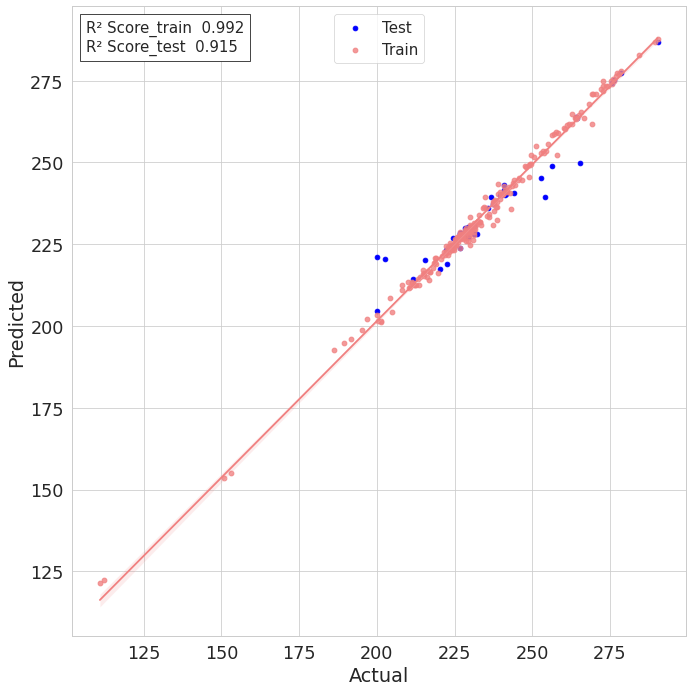

In [ ]:
# Random Forest
model = defining_model(x = 'rndmfrst')
kfold = KFold(n_splits=5, shuffle=True)

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  model.fit(trainX.iloc[train],trainY.iloc[train])
  scores.append(model.score(trainX.iloc[valid],trainY.iloc[valid]))
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted.reshape(-1,1)))))

print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))


# Train model on whole train data
model = defining_model(x = 'rndmfrst')
model.fit(trainX,trainY)
print("\n\nTraining Accuracy : ",model.score(trainX,trainY)) # Training Accuracy
plots()

Average validation R2 score after crossvalidation :  0.9630292203760851
Average validation rmse score after crossvalidation :  4.035552356658711


Training Accuracy :  0.9831208308392858
Mean absolute error (MAE):      2.553749
Mean squared error (MSE):       14.750110
Root mean squared error (RMSE): 3.840587
R square (R^2):                 0.966655


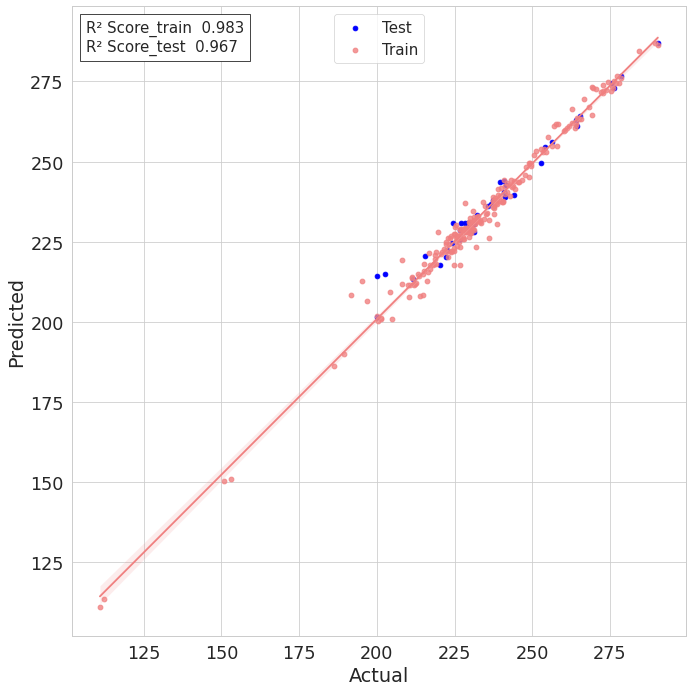

In [ ]:
model = Neural_network()

kfold = KFold(n_splits=5, shuffle=True, random_state=None)

best_score = 0.1

scores = []
rmse = []
for train,valid in kfold.split(trainX,trainY):
  training_model(trainX.iloc[train],trainY.iloc[train],model)
  scores.append(r2_score(trainY.iloc[valid],model.predict(trainX.iloc[valid])))
  
  actual = trainY.iloc[valid]
  predicted = model.predict(trainX.iloc[valid])
  rmse.append(sqrt(mean_squared_error(scaler.inverse_transform(actual),scaler.inverse_transform(predicted))))
    
print("Average validation R2 score after crossvalidation : ", np.mean(scores))
print("Average validation rmse score after crossvalidation : ", np.mean(rmse))

# Train model on whole train data

model = Neural_network()
training_model(trainX,trainY,model)
#actual = trainY
#predicted = model.predict(trainX)

actual=np.array(scaler.inverse_transform(np.array(trainY)))
predicted=np.array(scaler.inverse_transform(model.predict(np.array(trainX)).reshape(-1,1)))
model.save("nn.h5")
score = r2_score(actual,predicted)
print("\n\nTraining Accuracy : ",score) # Training Accuracy
plots()